In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from pandas_profiling import ProfileReport
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
x = df.drop(columns = 'quality')

In [6]:
x.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
y = df.quality

In [8]:
y.head(5)

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=45)

In [10]:
dt_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)

In [11]:
dt_bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [12]:
dt_bag.predict(x_test)

array([6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6,
       5, 5, 5, 6, 6, 6, 6, 5, 5, 7, 6, 4, 4, 6, 5, 5, 5, 5, 6, 6, 6, 6,
       7, 6, 5, 5, 5, 7, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       4, 6, 6, 5, 5, 5, 5, 5, 6, 5, 7, 7, 5, 6, 5, 7, 5, 5, 6, 7, 5, 6,
       5, 5, 5, 8, 5, 6, 7, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 7,
       5, 6, 5, 6, 5, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 4, 5, 7, 5,
       5, 5, 6, 6, 5, 5, 6, 7, 5, 6, 6, 5, 5, 6, 7, 6, 5, 6, 6, 5, 4, 5,
       7, 5, 7, 6, 6, 5, 6, 5, 6, 7, 6, 5, 7, 5, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 5, 5, 7, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6,
       7, 6, 5, 5, 6, 5, 6, 7, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6,
       7, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 8, 6, 6, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 7, 5, 7, 5, 7, 7,
       5, 5, 3, 6, 6, 5, 5, 6, 6, 4, 7, 7, 5, 5, 6,

In [13]:
dt_bag.score(x_train,y_train)

0.9841534612176814

In [14]:
dt_bag.score(x_test, y_test)

0.6975

In [15]:
dt_bag.base_estimator_

DecisionTreeClassifier()

In [16]:
dt_bag.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [18]:
dt_bag.bootstrap_features

False

In [20]:
dt_bag.estimator_params

()

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_bag = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

In [23]:
knn_bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [24]:
knn_bag.predict(x_test)

array([6, 6, 5, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 7, 6, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 4, 5, 5, 6, 5, 6, 5, 5,
       6, 5, 5, 6, 5, 7, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 7, 6, 6, 5,
       7, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6,
       6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 5, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 7, 5, 5, 6, 5, 6, 6, 7, 6, 5, 5, 6, 6, 6, 7,
       6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 6, 5, 6, 7, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6,
       7, 7, 5, 5, 6, 5, 6, 7, 6, 6, 7, 6, 5, 6, 7, 7, 5, 6, 5, 5, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6,
       5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 7,
       4, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5,

In [25]:
knn_bag.score(x_train, y_train)

0.6547122602168474

In [26]:
knn_bag.score(x_test, y_test)

0.53

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_bag = RandomForestClassifier(n_estimators=5)

In [39]:
rf_bag.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [40]:
rf_bag.predict(x_test)

array([6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5,
       6, 5, 4, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 7, 6, 6, 5, 5, 6,
       5, 6, 6, 6, 6, 6, 5, 5, 5, 7, 6, 5, 4, 6, 5, 5, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 5, 7, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6,
       6, 8, 7, 6, 6, 5, 5, 6, 6, 5, 7, 7, 5, 5, 5, 7, 5, 5, 6, 7, 6, 6,
       5, 6, 5, 8, 5, 6, 7, 5, 7, 5, 5, 5, 5, 7, 6, 5, 6, 5, 5, 5, 6, 7,
       5, 5, 5, 6, 5, 7, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 7, 6, 5, 7, 6, 5, 5, 5,
       7, 5, 6, 6, 5, 5, 7, 5, 6, 7, 6, 5, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5,
       6, 5, 6, 5, 5, 7, 6, 5, 6, 5, 6, 7, 5, 7, 6, 6, 5, 5, 6, 5, 6, 6,
       7, 7, 5, 5, 6, 5, 6, 5, 7, 6, 7, 5, 5, 5, 6, 7, 6, 5, 6, 6, 5, 6,
       7, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5, 5, 7, 5, 5, 8, 6, 7, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 4, 6, 5, 5, 7, 5, 7, 5, 7, 6,
       5, 6, 3, 5, 6, 5, 5, 6, 5, 4, 7, 7, 5, 4, 6,

In [41]:
rf_bag.score(x_train, y_train)

0.9599666388657214

In [42]:
dt_bag.score(x_train,y_train)

0.9841534612176814

In [43]:
knn_bag.score(x_train, y_train)

0.6547122602168474

In [44]:
rf_bag.score(x_test, y_test)

0.6325

In [45]:
dt_bag.score(x_test,y_test)

0.6975

In [46]:
knn_bag.score(x_test, y_test)

0.53

In [47]:
rf_bag.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1480795985),
 DecisionTreeClassifier(max_features='auto', random_state=1118710825),
 DecisionTreeClassifier(max_features='auto', random_state=566274722),
 DecisionTreeClassifier(max_features='auto', random_state=926052850),
 DecisionTreeClassifier(max_features='auto', random_state=904318111)]

In [48]:
rf_bag.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1480795985)

[Text(595.8009935461957, 1061.3142857142857, 'X[10] <= 10.25\ngini = 0.645\nsamples = 755\nvalue = [7, 43, 525, 461, 141, 22]'),
 Text(330.20327167737156, 1009.5428571428572, 'X[6] <= 91.5\ngini = 0.515\nsamples = 380\nvalue = [6, 26, 377, 179, 13, 0]'),
 Text(175.18915205039528, 957.7714285714286, 'X[1] <= 0.345\ngini = 0.552\nsamples = 324\nvalue = [6, 26, 294, 172, 13, 0]'),
 Text(33.08300395256917, 906.0, 'X[4] <= 0.058\ngini = 0.493\nsamples = 35\nvalue = [0, 3, 11, 38, 4, 0]'),
 Text(28.67193675889328, 854.2285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(37.49407114624506, 854.2285714285715, 'X[8] <= 3.425\ngini = 0.437\nsamples = 34\nvalue = [0, 0, 11, 38, 4, 0]'),
 Text(26.466403162055336, 802.4571428571429, 'X[2] <= 0.535\ngini = 0.334\nsamples = 29\nvalue = [0, 0, 5, 37, 4, 0]'),
 Text(17.64426877470356, 750.6857142857143, 'X[7] <= 1.0\ngini = 0.202\nsamples = 21\nvalue = [0, 0, 0, 31, 4, 0]'),
 Text(13.233201581027668, 698.9142857142858, 'X[3] <= 

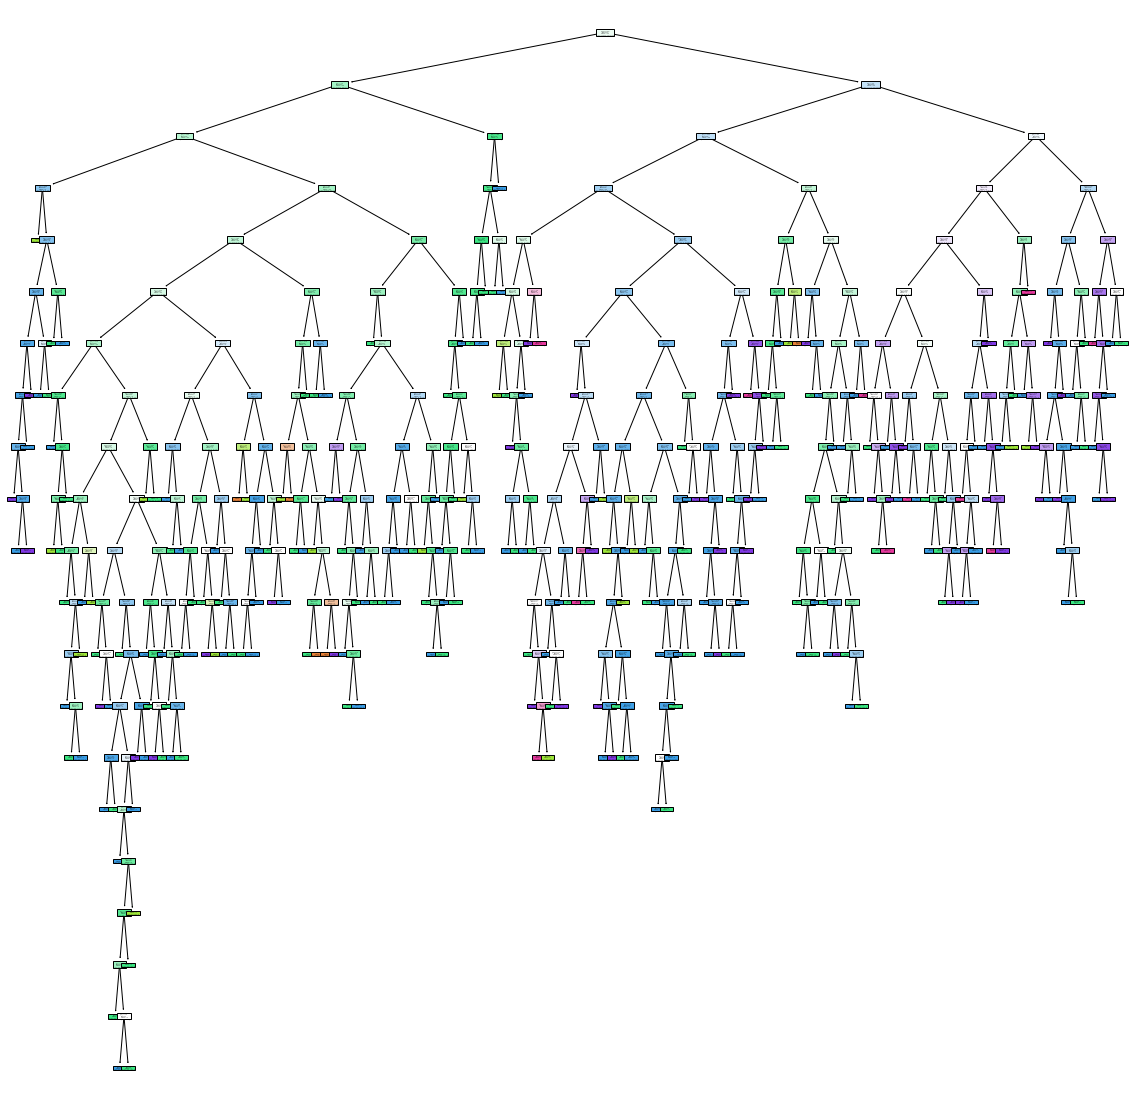

In [50]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf_bag.estimators_[0], filled = True)

[Text(471.5331835065569, 1064.55, 'X[10] <= 9.925\ngini = 0.643\nsamples = 746\nvalue = [4, 35, 517, 470, 155, 18]'),
 Text(153.78473772321428, 1019.25, 'X[6] <= 28.5\ngini = 0.471\nsamples = 318\nvalue = [2, 21, 354, 133, 11, 0]'),
 Text(48.575892857142854, 973.95, 'X[1] <= 0.317\ngini = 0.555\nsamples = 79\nvalue = [0, 3, 65, 55, 5, 0]'),
 Text(27.40178571428571, 928.6500000000001, 'X[0] <= 11.8\ngini = 0.508\nsamples = 10\nvalue = [0, 0, 1, 10, 5, 0]'),
 Text(22.419642857142854, 883.35, 'X[7] <= 0.999\ngini = 0.165\nsamples = 8\nvalue = [0, 0, 1, 10, 0, 0]'),
 Text(17.4375, 838.05, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 10, 0, 0]'),
 Text(27.40178571428571, 838.05, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(32.38392857142857, 883.35, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 5, 0]'),
 Text(69.75, 928.6500000000001, 'X[8] <= 3.545\ngini = 0.511\nsamples = 69\nvalue = [0, 3, 64, 45, 0, 0]'),
 Text(64.76785714285714, 883.35, 'X[9] <= 0.585\ngini = 0.499\nsa

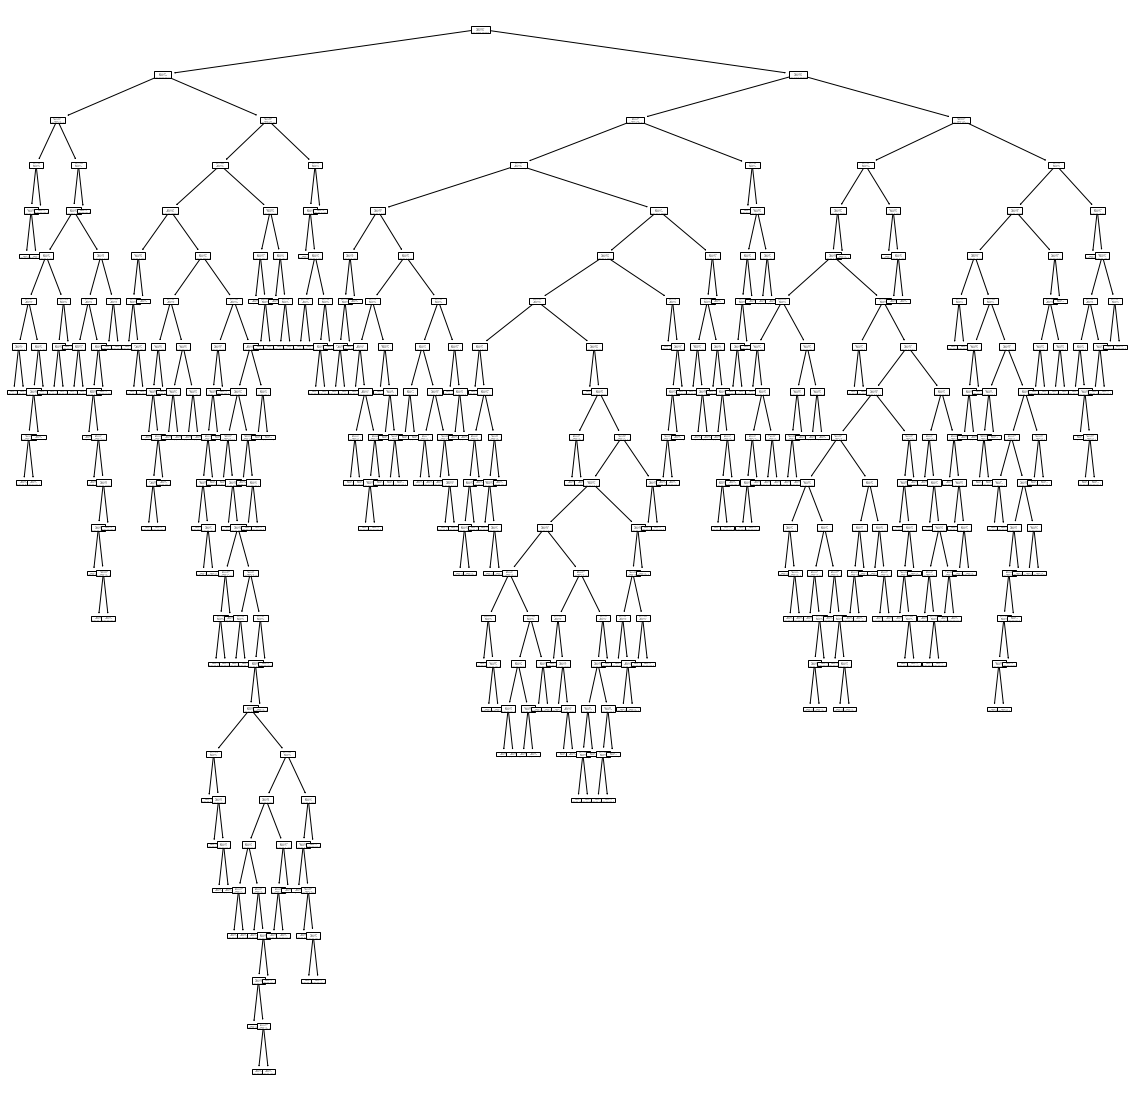

In [51]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf_bag.estimators_[1])

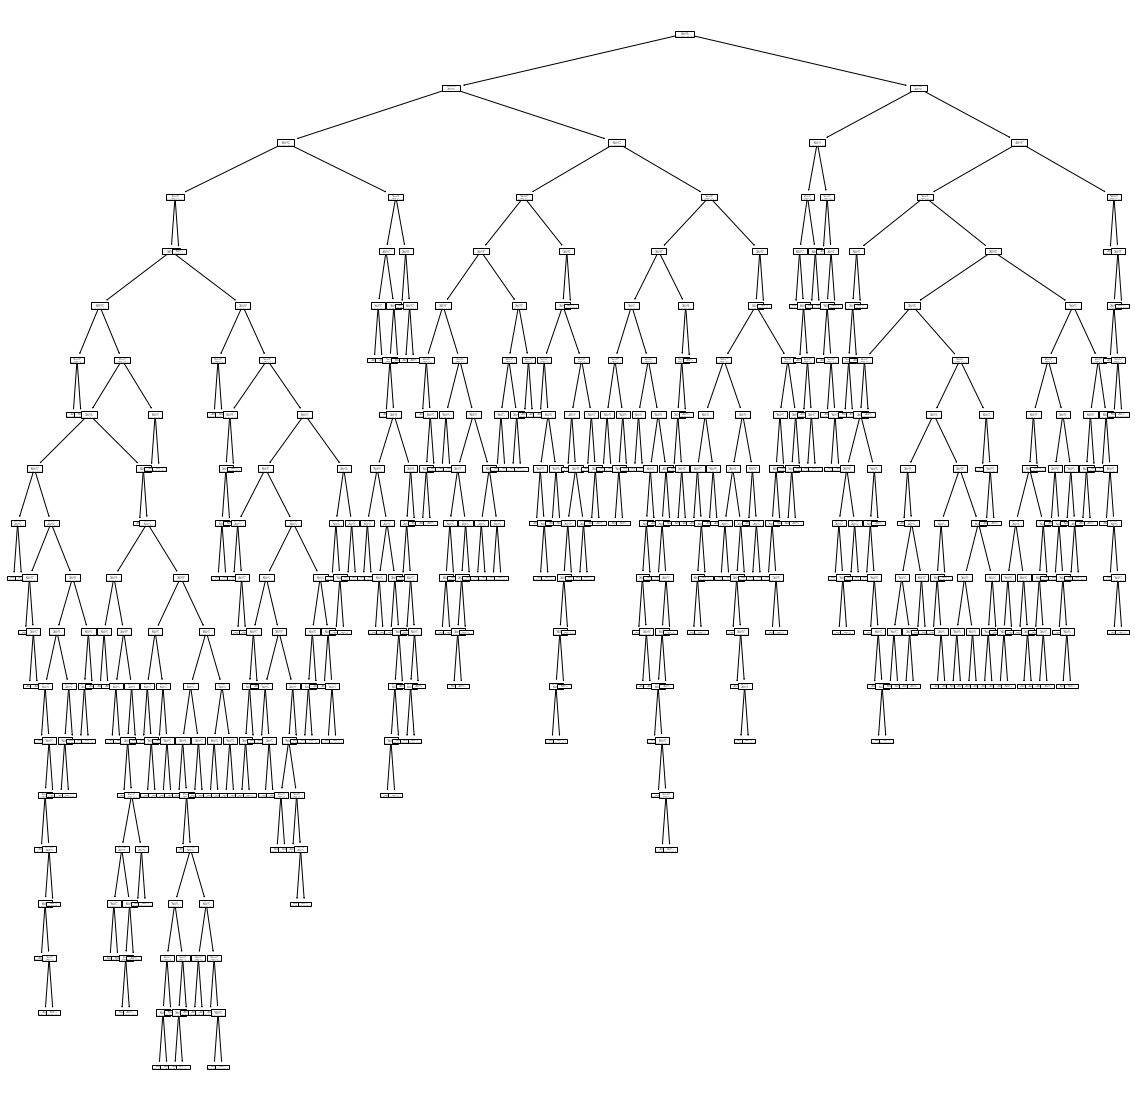

In [52]:
plt.figure(figsize=(20,20))
for i in range(len(rf_bag.estimators_)):
    tree.plot_tree(rf_bag.estimators_[i])

In [ ]:
rf_bag = RandomForestClassifier(n_estimators=5)

In [56]:
grid_pram = {
    'n_estimators' : [5,15,50,100,120],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(5),
    'min_samples_split' : range(5),
    'min_samples_leaf' : range(5)
}

In [57]:
grid_search_rf = GridSearchCV(estimator=rf_bag, param_grid=grid_pram, cv = 10, n_jobs=4, verbose=1)

In [58]:
grid_search_rf.fit(x_train, y_train)

Fitting 10 folds for each of 1250 candidates, totalling 12500 fits


C:\Users\ts-sachin.bhumihar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ts-sachin.bhumihar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.59129552 0.58462885 0.58711485]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 5),
                         'min_samples_leaf': range(0, 5),
                         'min_samples_split': range(0, 5),
                         'n_estimators': [5, 15, 50, 100, 120]},
             verbose=1)

In [59]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 50}

In [60]:
rf_bag_grid = RandomForestClassifier(criterion = 'gini', max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators = 50)

In [61]:
rf_bag_grid.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=50)

In [62]:
dt_bag.score(x_train,y_train)

0.9841534612176814

In [63]:
knn_bag.score(x_train, y_train)

0.6547122602168474

In [64]:
rf_bag.score(x_train, y_train)

0.9599666388657214

In [65]:
rf_bag_grid.score(x_train, y_train)

0.6538782318598833

In [66]:
dt_bag.score(x_test, y_test)

0.6975

In [67]:
knn_bag.score(x_test, y_test)

0.53

In [68]:
rf_bag.score(x_test, y_test)

0.6325

In [69]:
rf_bag_grid.score(x_test, y_test)

0.6375

[Text(624.96, 978.48, 'X[6] <= 62.5\ngini = 0.655\nsamples = 745\nvalue = [7, 38, 489, 472, 178, 15]'),
 Text(357.12, 761.0400000000001, 'X[7] <= 0.996\ngini = 0.666\nsamples = 570\nvalue = [7, 31, 313, 405, 162, 13]'),
 Text(178.56, 543.6, 'X[5] <= 13.5\ngini = 0.663\nsamples = 150\nvalue = [0, 5, 50, 115, 76, 7]'),
 Text(89.28, 326.1600000000001, 'X[2] <= 0.31\ngini = 0.66\nsamples = 73\nvalue = [0, 3, 21, 36, 56, 4]'),
 Text(44.64, 108.72000000000003, 'gini = 0.67\nsamples = 32\nvalue = [0, 3, 20, 16, 8, 0]'),
 Text(133.92000000000002, 108.72000000000003, 'gini = 0.489\nsamples = 41\nvalue = [0, 0, 1, 20, 48, 4]'),
 Text(267.84000000000003, 326.1600000000001, 'X[7] <= 0.996\ngini = 0.576\nsamples = 77\nvalue = [0, 2, 29, 79, 20, 3]'),
 Text(223.2, 108.72000000000003, 'gini = 0.605\nsamples = 71\nvalue = [0, 2, 29, 68, 20, 3]'),
 Text(312.48, 108.72000000000003, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 11, 0, 0]'),
 Text(535.6800000000001, 543.6, 'X[10] <= 9.85\ngini = 0.649\nsamp

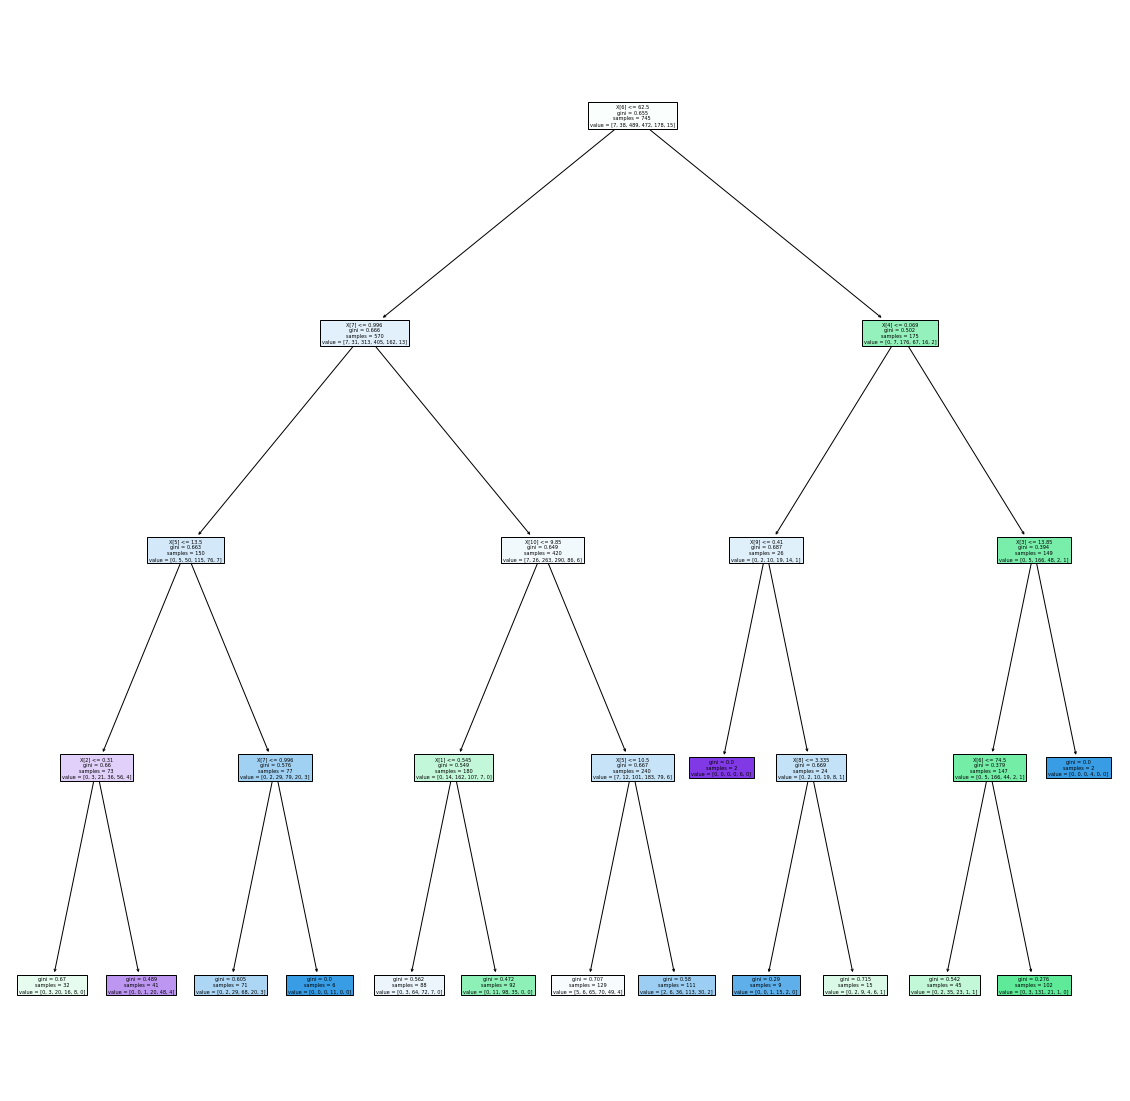

In [71]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf_bag_grid.estimators_[0], filled = True)

In [72]:
rf_bag_grid.estimators_

[DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=2,
                        min_samples_split=4, random_state=478472070),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=2,
                        min_samples_split=4, random_state=1258611317),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=2,
                        min_samples_split=4, random_state=486063134),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=2,
                        min_samples_split=4, random_state=2146348351),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=2,
                        min_samples_split=4, random_state=1616633098),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=2,
                        min_samples_split=4, random_state=567379271),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=2,
                        min_sam